In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('payment_fraud.csv')
df.head()

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,label
0,29,1,4.745402,paypal,28.204861,0
1,725,1,4.742303,storecredit,0.000000,0
2,845,1,4.921318,creditcard,0.000000,0
3,503,1,4.886641,creditcard,0.000000,0
4,2000,1,5.040929,creditcard,0.000000,0


In [4]:
df.shape

(39221, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39221 entries, 0 to 39220
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   accountAgeDays        39221 non-null  int64  
 1   numItems              39221 non-null  int64  
 2   localTime             39221 non-null  float64
 3   paymentMethod         39221 non-null  object 
 4   paymentMethodAgeDays  39221 non-null  float64
 5   label                 39221 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 1.8+ MB


In [6]:
df.describe()

,accountAgeDays,numItems,localTime,paymentMethodAgeDays,label
count,39221.000000,39221.000000,39221.000000,39221.000000,39221.000000
mean,857.563984,1.084751,4.748232,122.641326,0.014278
std,804.788212,0.566899,0.389360,283.569177,0.118636
min,1.000000,1.000000,0.421214,0.000000,0.000000
25%,72.000000,1.000000,4.742303,0.000000,0.000000
50%,603.000000,1.000000,4.886641,0.012500,0.000000
75%,1804.000000,1.000000,4.962055,87.510417,0.000000
max,2000.000000,29.000000,5.040929,1999.580556,1.000000


In [7]:
df.isnull().sum()

accountAgeDays          0
numItems                0
localTime               0
paymentMethod           0
paymentMethodAgeDays    0
label                   0
dtype: int64

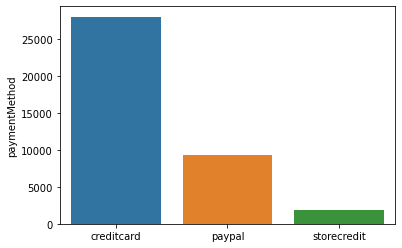

In [14]:
paymthd = df.paymentMethod.value_counts()
sns.barplot(paymthd.index, paymthd)
plt.show()

In [15]:
label_enco_paymthd = {value:key for key,value in enumerate(df['paymentMethod'].unique())}
df['paymentMethod'] = df['paymentMethod'].map(label_enco_paymthd)

In [16]:
df.head()

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,label
0,29,1,4.745402,0,28.204861,0
1,725,1,4.742303,1,0.000000,0
2,845,1,4.921318,2,0.000000,0
3,503,1,4.886641,2,0.000000,0
4,2000,1,5.040929,2,0.000000,0


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler

In [24]:
X = df.iloc[:,:-1]
y = df.iloc[:, -1]

In [25]:
sc = StandardScaler()
lr = LogisticRegression()

In [26]:
X = sc.fit_transform(X)

In [27]:
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size = 0.25, random_state = 1)
X_train.shape, X_test.shape,y_train.shape,y_test.shape

((29415, 5), (9806, 5), (29415,), (9806,))

In [28]:
lr.fit(X_train,y_train)

LogisticRegression()

In [29]:
y_pred = lr.predict(X_test)

In [33]:
compare = pd.DataFrame({'Actual': y_test, 'predicted': y_pred})
compare.tail()

,Actual,predicted
24514,0,0
37050,0,0
1525,0,0
12336,0,0
20760,0,0


In [35]:
print('-------------Accuracy-----------')
print(accuracy_score(y_test,y_pred))
print('-------------Classfication Report-----------')
print(classification_report(y_test,y_pred))
print('-------------Confusion matrix-----------')
print(confusion_matrix(y_test,y_pred))

-------------Accuracy-----------
0.9852131348154192
-------------Classfication Report-----------
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      9661
           1       0.00      0.00      0.00       145

    accuracy                           0.99      9806
   macro avg       0.49      0.50      0.50      9806
weighted avg       0.97      0.99      0.98      9806

-------------Confusion matrix-----------
[[9661    0]
 [ 145    0]]


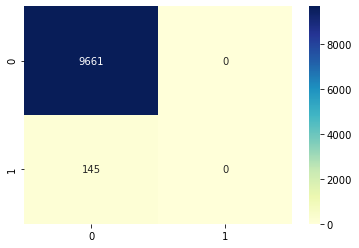

In [46]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='g',cmap="YlGnBu")
plt.show()

# Thank You !!!